# Regularyzacja w modelu regresji - porównanie regresji grzbietowej i regresji Lasso

In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

**Regularyzacja grzbietowa** i **Lasso** są technikami, które są wykorzystywane do budowania **oszczędnych modeli**, w rozumieniu obecności zbyt dużej liczby predyktorów. 
Przez dużą liczbę predyktorów rozumiemy:

- *duża liczba predyktorów* to taka, która prowadzi do **przeuczenia modelu** (ang. *overfitting*) -- nawet tak niewielka liczba jak 10 zmiennych może prowadzić do przeuczenia,
    
- *duża liczba predyktorów* to taka, która może prowadzić do problemów z **wydajnością obliczeniową** -- przy obecnych możliwościach komputerów, taka sytuacja może mieć miejsce przy występowaniu milionów lub miliardów cech.

Techniki regularyzacyjne działają poprzez 
- karanie wielkości współczynników cech, 
- minimalizowanie błędu między przewidywanymi a rzeczywistymi obserwacjami.

## Dlaczego karamy za wielkość współczynników?

Rozważmy następujący przykład celem zrozumienia wpływu złożoności modelu na wielkość współczynników.

W tym celu dopasujmy krzywą regresji do krzywej sinusoidalnej (od 0° do 360°) z dodanym szumem.

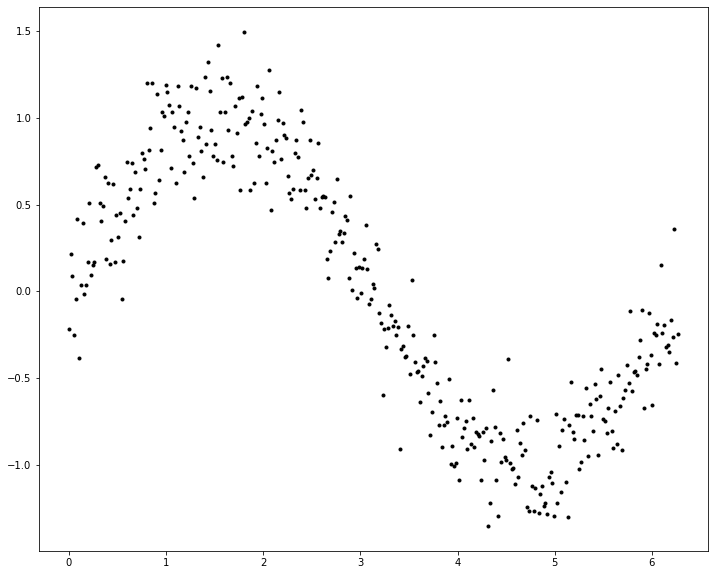

In [2]:
# generacja danych

np.random.seed(123) 

x = np.array([i * np.pi / 180 for i in range(0, 360, 1)])
X = pd.DataFrame(x)
y = np.sin(x) + np.random.normal(0, 0.2, len(x))

plt.plot(x, y, '.', color='black')

In [3]:
#lambda to taka prosta funkcja, bierze dowolną liczbę argumentów, ale może mieć w sobie tylko jedno wyrażenie
rss_fun  = lambda y, y_pred: sum((y_pred - y)**2)

In [4]:
# funkcja tworzy model regresji wielomianowej bez regularyzacji, dopasowuje model do danych
# i rysuje wykres dla dopasowanych wartości w modelu; zwraca RSS, wyraz wolny i resztę współczynników 

def linear_regression(X, y, power, models_to_plot):
    
    reg = make_pipeline(PolynomialFeatures(power), StandardScaler(), LinearRegression())
    
    reg.fit(X, y)
    y_pred = reg.predict(X)
    
    if power in models_to_plot:
        
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(x, y_pred)
        plt.plot(x, y, '.')
        plt.title('Plot for power: %d' %power)
    
    ret = [rss_fun(y, y_pred)]
    ret.extend([reg.named_steps['linearregression'].intercept_])
    ret.extend(reg.named_steps['linearregression'].coef_[1:])
    
    return ret

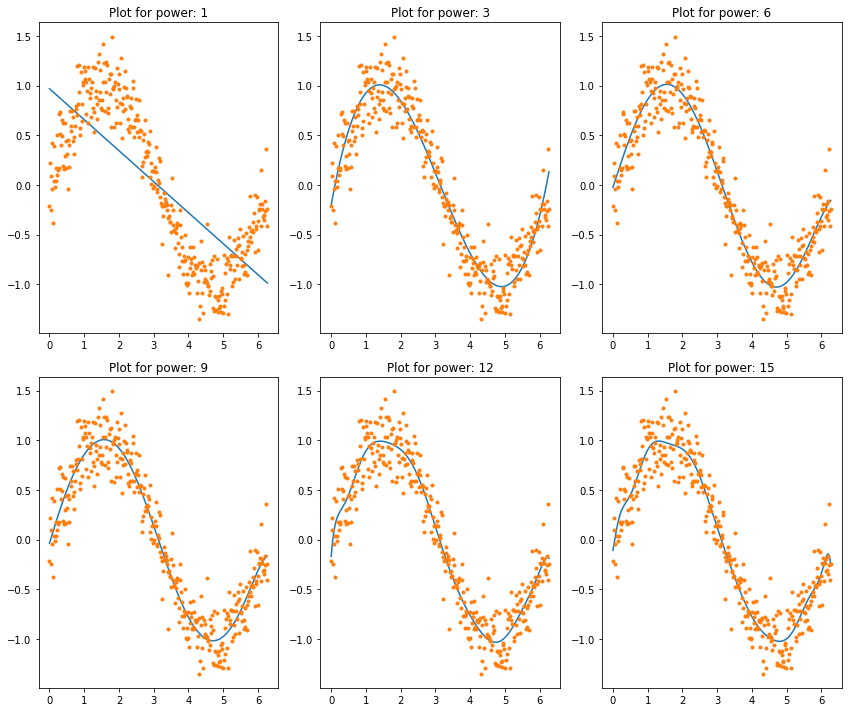

In [5]:
# rysujemy wykres regresji wielomianowej bez regularyzacji, dla różnych potęg

col = ['RSS', 'Intercept'] + ['coef_x_%d' %i for i in range(1, 16)]
ind = ['model_pow_%d' %i for i in range(1, 16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1: 231, 3: 232, 6: 233, 9: 234, 12: 235, 15: 236}

for i in range(1, 16):
    coef_matrix_simple.iloc[i-1, 0:i+2] = linear_regression(X, y, power=i, models_to_plot=models_to_plot)

In [6]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,RSS,Intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,86,-0.0092,-0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,86,-0.0092,-0.52,-0.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,16,-0.0092,3.5,-10,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,16,-0.0092,3.6,-11,7.7,-0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,15,-0.0092,1.6,3.8,-30,40,-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,14,-0.0092,1.9,0.022,-16,14,5.9,-6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,14,-0.0092,2.2,-3.8,4.3,-38,77,-56,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,14,-0.0092,2.5,-9.1,41,-1.7e+02,3.4e+02,-3.4e+02,1.8e+02,-40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,14,-0.0092,2.1,0.11,-41,2.1e+02,-6.7e+02,1.2e+03,-1.3e+03,7.1e+02,-1.6e+02,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,14,-0.0092,2.4,-6.8,36,-2.4e+02,8.5e+02,-2e+03,2.9e+03,-2.7e+03,1.4e+03,-3e+02,NaN,NaN,NaN,NaN,NaN


**Podsumowanie**:

- wielkość współczynników regresji rośnie eksponencjalnie wraz ze wzrostem złożoności modelu,
- wielkość współczynnika regresji wpływa na istotność zmiennej odpowiadającej temu współczynnikowi w oszacowaniu wielkość zmiennej odpowiedzi, ale gdy wielkość współczynnika jest zbyt duża, algorytm modeluje skomplikowane relacje w celu oszacowania wyników, co często kończy się zbytnim dopasowaniem do danych,

# Regularyzacja grzbietowa (ang. *rigde regression*)

Metoda najmniejszych kwadratów z regularyzacją $l2$, minimalizuje **funkcję kryterialną**:

$$||y - Xb||^2_2 + \alpha \cdot ||b||^2_2,$$

gdzie dla dowolnego wektora $n$-wymiarowego $a = (a_1, a_2, \ldots, a_n)$ zachodzi: $||a||_2 = \sqrt{\sum_{i=1}^n a_i^2}$.

$\alpha$ - siła regularyzacja, $\alpha > 0$ 

* gdy $\alpha = 0$ -- problem uprasza się do zwykłej regresji
* gdy $\alpha = +\infty$ -- współczynnik są równe zeru

## Zadanie 1
Napisz funkcję, która dla dowolnego zbioru ($X$ i $y$) oraz stopnia wielomianu dopasuje model regresji wielomianowej z regularyzacją Ridge z danym parametrem $\alpha$. Ponadto, funkcja narysuje wykres rozproszenia i dopasowaną funkcję regresji dla $k$ danych wartości parametru $\alpha$ przy ustalonym stopniu wielomianu (parametr 
`models_to_plot`).

Następnie wyznacz ramkę danych `coef_matrix_ridge` dla ustalonego stopnia wielomianu (np. 15), której wiersze dla ustalonej będą zawierały: wartość RSS oraz kolejne wartości współczynników regresji dla różnych parametrów $\alpha$, np. lista `alpha_ridge`.

Sprawdź jak zmieniają się wartości współczynników regresji z regularyzacją grzbietową wraz ze zmianą parametru $\alpha$.

In [7]:
# analogiczna funkcja co wcześniej, ale teraz dla Ridge

from sklearn.linear_model import Ridge

def ridge_regression(X, y, alpha, power, models_to_plot={}):
    
    ridgereg = make_pipeline(PolynomialFeatures(power), StandardScaler(), Ridge(alpha = alpha))
    
    ridgereg.fit(X, y)
    y_pred = ridgereg.predict(X)
    
    if alpha in models_to_plot:
        
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(x, y_pred)
        plt.plot(x, y, '.')
        plt.title('Plot for alpha: %.3g' %alpha)
    
    ret = [rss_fun(y, y_pred)]
    ret.extend([ridgereg.named_steps['ridge'].intercept_])
    ret.extend(ridgereg.named_steps['ridge'].coef_[1:])
    
    return ret

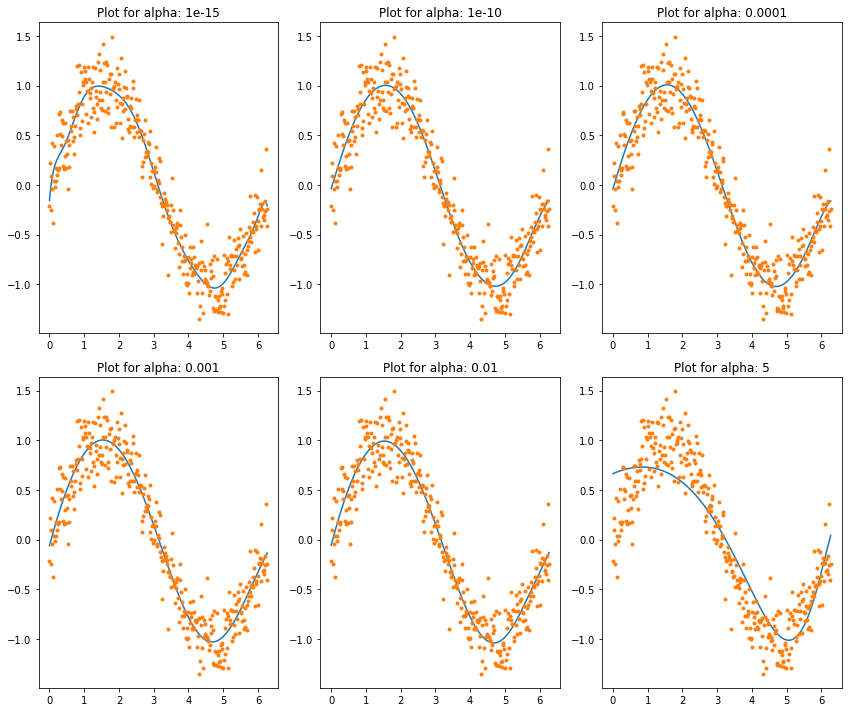

In [18]:
# rysujemy wykres regresji wielomianowej z regularyzacją ridge,dla różnych alph dla potęgi 15

alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

col = ['RSS','Intercept'] + ['coef_x_%d' %i for i in range(1, 16)]
ind = ['alpha_%.2g' %alpha_ridge[i] for i in range(0, len(alpha_ridge))]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15: 231, 1e-10: 232, 1e-4: 233, 1e-3: 234, 1e-2: 235, 5: 236}


power = 15
for i in range(len(alpha_ridge)):
    coef_matrix_ridge.iloc[i] = ridge_regression(X, y, alpha_ridge[i], power, models_to_plot)

In [11]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,RSS,Intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,14,-0.0092,7.3,-1.9e+02,2.7e+03,-2.1e+04,9.5e+04,-2.8e+05,5.1e+05,-5.8e+05,3.2e+05,1.2e+05,-4e+05,4e+05,-2.4e+05,9e+04,-1.6e+04
alpha_1e-10,14,-0.0092,2.1,-2.1,9.6,-2.3e+02,1.2e+03,-3.3e+03,3.9e+03,-3.3e+02,-3.4e+03,7.9e+02,3.2e+03,-7.9e+02,-3.3e+03,2.9e+03,-7.1e+02
alpha_1e-08,14,-0.0092,2.1,-1.3,-21,73,-1.3e+02,50,1.5e+02,-55,-1.6e+02,-26,1.3e+02,1e+02,-59,-1.2e+02,69
alpha_0.0001,14,-0.0092,2.2,-2.4,-6.5,1.3,5.8,4.3,0.25,-2.9,-3.6,-2.3,0.099,2.2,2.8,1.3,-2.8
alpha_0.001,15,-0.0092,2.4,-3.8,-3.9,1.4,3.6,2.7,0.59,-1.1,-1.7,-1.4,-0.5,0.43,0.94,0.68,-0.6
alpha_0.01,15,-0.0092,2.4,-4.6,-2,0.97,2.1,1.8,0.96,0.062,-0.57,-0.87,-0.85,-0.59,-0.2,0.26,0.72
alpha_1,22,-0.0092,0.99,-1.8,-1.2,-0.31,0.31,0.6,0.66,0.58,0.43,0.26,0.083,-0.075,-0.21,-0.32,-0.4
alpha_5,34,-0.0092,0.27,-0.87,-0.69,-0.3,0.026,0.23,0.33,0.34,0.31,0.24,0.15,0.047,-0.059,-0.17,-0.27
alpha_10,41,-0.0092,0.036,-0.62,-0.49,-0.23,-0.017,0.13,0.2,0.23,0.21,0.18,0.12,0.062,-0.0047,-0.074,-0.14
alpha_20,48,-0.0092,-0.12,-0.45,-0.35,-0.18,-0.041,0.056,0.11,0.14,0.14,0.12,0.1,0.069,0.033,-0.0048,-0.043


**Podsumowanie**:

- wielkość RSS (suma kwadratów błędów) rośnie wraz ze wzrostem wartości $\alpha$, wraz z redukcją złożoności modelu,
- $\alpha = 1e-15$ daje istotną redukcję wielkości współczynników regresji,
- wyższe wartości $\alpha$ prowadzą do niedouczenia modelu (gwałtowny wzrost RSS dla $\alpha > 1$),
- wiele współczynników jest bardzo małych, ale nie równych zeru.

# Regularyzacja Lasso (ang. *Lasso regression*)

LASSO - Least Absolute Shrinkage and Selection Operator

Metoda najmniejszych kwadratów z regularyzacją $l1$, minimalizuje **funkcję kryterialną**:

$$||y - Xb||^2_2 + \alpha \cdot ||b||_1,$$

gdzie dla dowolnego wektora $n$-wymiarowego $a = (a_1, a_2, \ldots, a_n)$ zachodzi: $||a||_1 = \sum_{i=1}^n |a_i|$.

## Zadanie 2
Napisz funkcję, która dla dowolnego zbioru ($X$ i $y$) oraz stopnia wielomianu dopasuje model regresji wielomianowej z regularyzacją Lasso z danym parametrem $\alpha$. Ponadto, funkcja narysuje wykres rozproszenia i dopasowaną funkcję regresji dla $k$ danych wartości parametru $\alpha$ przy ustalonym stopniu wielomianu (parametr 
`models_to_plot`).

Następnie wyznacz ramkę danych `coef_matrix_ridge` dla ustalonego stopnia wielomianu (np. 15), której wiersze dla ustalonej będą zawierały: wartość RSS oraz kolejne wartości współczynników regresji dla różnych parametrów $\alpha$, np. lista `alpha_ridge`.

Sprawdź jak zmieniają się wartości współczynników regresji z regularyzacją Lasso wraz ze zmianą parametru $\alpha$.

In [12]:
# definiujemy funkcję, która dopasowuje model lasso dla regresji wielomianowej i tworzy wykresy dla pewnych alpha,
# zwraca współczynniki i RSS

from sklearn.linear_model import Lasso

def lasso_regression(X, y, alpha, power, models_to_plot={}):
    
    lassoreg = make_pipeline(PolynomialFeatures(power), StandardScaler(), Lasso(alpha = alpha, max_iter = 1000000))
    lassoreg.fit(X, y)
    y_pred = lassoreg.predict(X)
    
    if alpha in models_to_plot:
        
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(x, y_pred)
        plt.plot(x, y, '.')
        plt.title('Plot for alpha: %.3g' %alpha)
    
    ret = [rss_fun(y, y_pred)]
    ret.extend([lassoreg.named_steps['lasso'].intercept_])
    ret.extend(lassoreg.named_steps['lasso'].coef_[1:])
    
    return ret    

/home/mdabrowski-phd/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.237e+00, tolerance: 2.015e-02
  model = cd_fast.enet_coordinate_descent(
/home/mdabrowski-phd/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.236e+00, tolerance: 2.015e-02
  model = cd_fast.enet_coordinate_descent(
/home/mdabrowski-phd/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

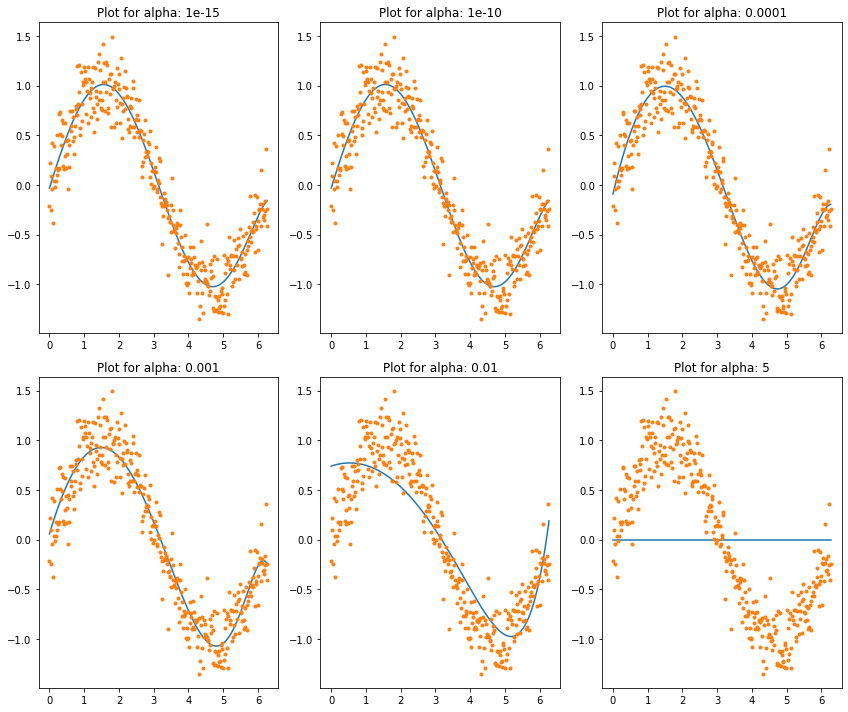

In [19]:
#rysujemy wykres regresji wielomianowej z regularyzacją lasso, dla różnych alph dla potęgi 15

alpha_lasso = [1e-15, 1e-10, 1e-8,1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10]

col = ['RSS','Intercept'] + ['coef_x_%d' %i for i in range(1, 16)]
ind = ['alpha_%.2g' %alpha_lasso[i] for i in range(0, len(alpha_lasso))]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15: 231, 1e-10: 232, 1e-4: 233, 1e-3: 234, 1e-2: 235, 5: 236}

power = 15
for i in range(len(alpha_lasso)):
    coef_matrix_lasso.iloc[i] = lasso_regression(X, y, alpha_lasso[i], power, models_to_plot)

In [15]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,RSS,Intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,14,-0.0092,2.1,-1.3,-11,6.3,6.3,1.4,-1.9,-2.6,-1.7,-0.36,0.69,1.1,0.94,0.17,-1
alpha_1e-10,14,-0.0092,2.1,-1.3,-11,6.3,6.3,1.4,-1.9,-2.6,-1.7,-0.36,0.69,1.1,0.94,0.17,-1
alpha_1e-08,14,-0.0092,2.1,-1.3,-11,6.3,6.3,1.4,-1.9,-2.6,-1.7,-0.35,0.68,1.1,0.94,0.16,-1
alpha_1e-05,15,-0.0092,2.4,-3.9,-3.6,0,6.9,0,-0,-0.11,-2.3,-0,-0,0,0,0,0.32
alpha_0.0001,15,-0.0092,2.7,-5.9,-0,0,3.7,0,0,-0,-0,-0.4,-0.55,-0,-0,0,0.086
alpha_0.001,16,-0.0092,2.1,-4.8,-0,0,1.7,0.99,0,0,0,-0,-0,-0,-0,-0,-0.43
alpha_0.01,40,-0.0092,0.22,-1.3,-0,-0,0,0,0,0.68,0,0,0,0,0,0,-0
alpha_1,2e+02,-0.0092,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,2e+02,-0.0092,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,2e+02,-0.0092,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


**Podsumowanie**:

- wielkość RSS (suma kwadratów błędów) rośnie wraz ze wzrostem wartości 𝛼, wraz z redukcją złożoności modelu,
- dla tych samym wartości $\alpha$, wielkość współczynników regresji z regularyzacją Lasso jest mniejsza niż wartości odpowiadających współczynników w regresji z regularyzacją grzbietową,
- dla tych samych wartości $\alpha$ regresja z regularyzacją Lasso ma wyższe RSS w porównaniu do regresji z regularyzacją grzbietową (gorsze dopasowanie modelu),
- wiele współczynników jest zerowa (nawet dla niewielkich wielkości $\alpha$).

## Porównanie regularyzacji grzbietowej z regularyzacją Lasso

### Ridge
- zawiera wszystkie (lub żadne) cechy w modelu, główną zaletą tej regularyzacji jest **ściągniecie współczynników** (ang. **shrinkage coefficient**),
- regresji grzbietowej używa się głowniej do **uniknięcia przeuczenia** modelu, ale z racji, że zawiera wszystkie zmienne z modelu nie jest użyteczny w przypadku wielowymiarowych danych (gdy liczbę predyktorów szacuje się milionach/miliardach -- zbyt duża złożoność obliczeniowa),
- zasadniczo działa dobrze nawet w obecności silnie **skorelowanych** cech -- uwzględnia wszystkie skorelowane zmienne w modelu, ale wielkość współczynników zależy od wielkości korelacji.


### Lasso 
- regularyzacja Lasso poza **ściągniecie współczynników**, dokonuje również selekcji zmiennych
- regularyzacje Lasso często wykorzystuje się do **selekcji zmiennych** w przypadku do liczba cech jest rzędu milionów/miliardów
- wybiera dowolną cechę spośród cech silnie skorelowanych, współczynniki pozostałych cechy skorelowanych z wybraną zmienną redukuje do zera, ale wybrana zmienna zmienia się losowo wraz ze zmianą parametrów modelu -- podejście te działa gorzej niż regularyzacja grzbietowa